<a href="https://colab.research.google.com/github/fatemerezaee/Regression_prediction_with_Python_Scikit_Learn/blob/main/Zn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import impute

In [ ]:
#Importing data from google drive

from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/mahabad_Zn.csv"
df_bonus = pd.read_csv(path)
 
data= pd.read_csv("/content/drive/My Drive/mahabad_Zn.csv")
data.rename(index= data.stations, inplace=True)
data.drop('stations', axis=1, inplace=True)
data.head()

Mounted at /content/drive


,total_con,F1,F2,F3,F4,F5,pH,EC,OM,target (BF)
M1,105,10.42,7.53,13.55,12.72,55.78,6.80,970,8.40,17.95
M4,88,9.38,5.40,15.83,12.35,57.04,7.10,1060,8.00,14.78
M6,89,1.12,3.34,5.11,3.27,87.16,7.06,840,7.98,4.46
M8,110,0.98,2.53,4.31,4.74,87.44,6.90,1190,8.11,3.51
M12,149,13.38,3.12,13.78,4.74,59.77,7.11,1185,7.50,16.50


# Preproccesing

In [ ]:
data.describe()

,total_con,F1,F2,F3,F4,F5,pH,EC,OM,target (BF)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,108.000000,7.100000,3.136364,8.373636,9.481818,71.434545,7.001818,1097.727273,7.783636,10.236364
std,31.902978,5.142398,1.811597,4.444262,5.461631,13.549022,0.141691,328.499343,2.277763,6.016498
min,76.000000,0.960000,1.410000,4.010000,3.270000,55.780000,6.800000,560.000000,5.100000,2.370000
25%,85.000000,1.350000,2.085000,4.710000,4.525000,60.085000,6.860000,905.000000,6.825000,3.985000
50%,97.000000,8.320000,2.530000,6.320000,10.820000,67.400000,7.060000,1185.000000,7.500000,10.730000
75%,129.500000,9.900000,3.230000,12.590000,13.535000,87.150000,7.105000,1287.500000,8.055000,15.640000
max,162.000000,14.870000,7.530000,15.830000,18.350000,89.220000,7.190000,1585.000000,13.920000,17.950000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, M1 to M20
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_con    11 non-null     int64  
 1   F1           11 non-null     float64
 2   F2           11 non-null     float64
 3   F3           11 non-null     float64
 4   F4           11 non-null     float64
 5   F5           11 non-null     float64
 6   pH           11 non-null     float64
 7   EC           11 non-null     int64  
 8   OM           11 non-null     float64
 9   target (BF)  11 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 968.0+ bytes


Let's creating synthetic data for better performance

---
# Creating Synthetic Data Vault_SDV


In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

**GaussianCopula Model**

In [ ]:
#model fitting

from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(data)

In [ ]:
#Generate synthetic data from the model

data_gc = model.sample(num_rows=89)

In [ ]:
#Concat real and new dataframes

frames= [data, data_gc]
data_result = pd.concat(frames)
data_result= data_result.reset_index(drop=True)
data_result.head()

,total_con,F1,F2,F3,F4,F5,pH,EC,OM,target (BF)
0,105,10.42,7.53,13.55,12.72,55.78,6.80,970,8.40,17.95
1,88,9.38,5.40,15.83,12.35,57.04,7.10,1060,8.00,14.78
2,89,1.12,3.34,5.11,3.27,87.16,7.06,840,7.98,4.46
3,110,0.98,2.53,4.31,4.74,87.44,6.90,1190,8.11,3.51
4,149,13.38,3.12,13.78,4.74,59.77,7.11,1185,7.50,16.50


In [ ]:
data_result.describe()

,total_con,F1,F2,F3,F4,F5,pH,EC,OM,target (BF)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000
mean,113.550000,8.208800,3.576400,9.665300,10.419000,70.524100,6.990200,1105.8600,7.889600,10.936700
std,26.477883,4.231792,1.477266,3.514872,4.441646,10.022875,0.103913,306.0373,2.137097,4.645852
min,76.000000,0.960000,1.410000,4.010000,3.270000,55.780000,6.800000,560.0000,5.100000,2.370000
25%,89.750000,5.150000,2.377500,6.547500,6.360000,61.030000,6.900000,843.7500,6.220000,7.110000
50%,109.000000,8.455000,3.225000,9.465000,10.810000,69.355000,7.010000,1104.0000,7.405000,11.075000
75%,136.250000,11.987500,4.590000,12.452500,13.940000,78.582500,7.060000,1389.2500,9.505000,15.537500
max,162.000000,14.870000,7.530000,15.830000,18.350000,89.220000,7.190000,1585.0000,13.920000,17.950000


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
copulas 0.8.0 requires matplotlib<4,>=3.4.0; python_version >= "3.7" and python_version < "3.10", but you have matplotlib 3.1.3 which is incompatible.


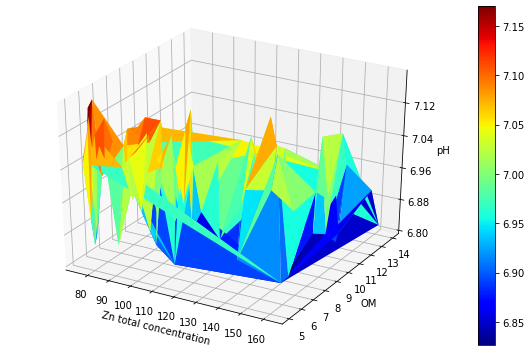

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt

# Plottting 3d map

import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

xdata = data_result['total_con'].values.tolist()
ydata = data_result['OM'].values.tolist()
zdata = data_result['pH'].values
# xdata = np.array(xdata)
# ydata = np.array(ydata)
# zdata = np.array(zdata)

fig = plt.figure(figsize= (8, 5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(xdata, ydata, zdata, cmap=cm.jet, linewidth=0)
# surf = ax.plot_trisurf(xdata-xdata.mean(), ydata-ydata.mean(), zdata, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

ax.xaxis.set_major_locator(MaxNLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(10))
ax.zaxis.set_major_locator(MaxNLocator(5))

ax.set_xlabel('Zn total concentration')
ax.set_ylabel('OM')
ax.set_zlabel('pH')

fig.tight_layout()
plt.show()

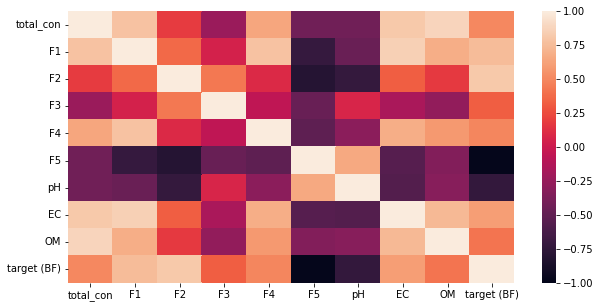

In [ ]:
# Plotting correlation heatmap

from scipy.stats import pearsonr

corr= data_result.corr()


#Heat map of pearson correlation

plt.figure(figsize=(10,5))
sns.heatmap(corr, vmin=-1, vmax=+1)
plt.show()

# Feature Importance


https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [ ]:
X = data_result.iloc[:, range(6, 9)]   #pH, EC and OM
Y = data_result.iloc[:, -1]            #target

In [ ]:
# linear regression feature importance

from sklearn.ensemble import RandomForestRegressor


# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

features= ('pH', 'EC', 'OM')

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.63092
Feature: 1, Score: 0.22669
Feature: 2, Score: 0.14240


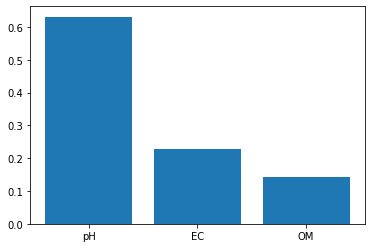

In [ ]:
# plot feature importance (Bar Plot)

plt.bar(features, importance)
plt.show()

https://plotly.com/python/radar-chart/

In [ ]:
# plot feature importance (Spider Chart )

import plotly.express as px

df = pd.DataFrame(dict(
    r= importance,
    theta=['pH', 'CEC', 'OM']))

fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

# Let's Train the augmented data

In [ ]:
# determining data and target

x = data_result.iloc[:, range(0, 9)]      #GaussianCopula_result data
y = data_result.iloc[:, -1]               #GaussianCopula_result target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**1_ Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtc= DecisionTreeRegressor(random_state= 13, criterion= 'friedman_mse')
dtc.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=13)

In [ ]:
# # find optimal criterion and random_state with grid search

# # criterion= ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
# random_state= range(0, 43)
# param_grid = dict(random_state= random_state, criterion= criterion)

# grid = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
# grid_result = grid.fit(x_train, y_train)

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [ ]:
#Predicting y for x_samp_test

dtc_predict= dtc.predict(x_test)
dtc_predict

array([16.16, 16.16,  5.78, 12.25,  4.  ,  9.52, 15.77,  8.43,  2.56,
       17.22,  5.87, 11.91, 11.46, 16.39,  5.3 , 14.78, 16.16, 15.77,
       16.05,  8.81, 17.17, 16.09,  5.3 , 10.52,  8.81, 17.17, 11.91,
       14.12,  4.  , 14.11])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = dtc.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', dtc.score(x_test, y_test))
print('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9281327360639366
MSE:  1.6825300000000005 
 MAE:  1.0263333333333333 
 r2:  0.9281327360639366 
 EVS:  0.9281830861520048 
 MPL:  0.5131666666666667


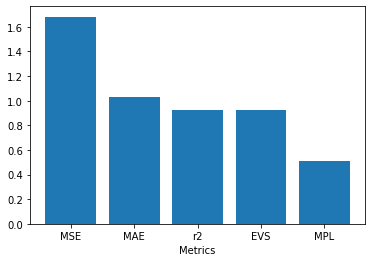

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.97417929 0.87497141 0.78191596 0.93258939 0.9577662 ]
Average CV Score:  0.9042844504671332
Number of CV Scores used in Average:  5


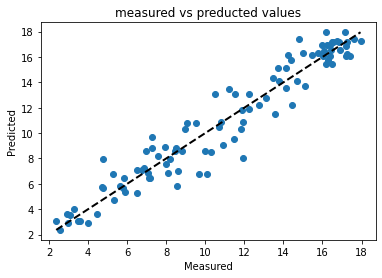

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
dtc_cross = DecisionTreeRegressor(random_state= 13, criterion= 'friedman_mse')
scores = cross_val_score(dtc_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
dtc_pred = cross_val_predict(dtc_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, dtc_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**2_ Gradient Boosting**

In [ ]:
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor(n_estimators= 90, criterion= 'squared_error')
gbr.fit(x_train, y_train)

GradientBoostingRegressor(criterion='squared_error', n_estimators=90)

In [ ]:
# # find optimal n_estimators and criterion  with grid search

# criterion= ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
# n_estimators = [10, 20, 30, 40, 50 ,60, 70, 80, 90 ,100]
# param_grid = dict(criterion= criterion, n_estimators= n_estimators)

# grid = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
# grid_result = grid.fit(x_train, y_train)

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [ ]:
#Predicting y for x_samp_test

gbr_predict= gbr.predict(x_test)
gbr_predict

array([16.31663188, 15.5810519 ,  4.2114441 , 10.40167018,  3.26518837,
       10.61228963, 16.76801121,  9.07836086,  2.86372258, 16.98519492,
        4.8040596 , 11.98445253, 10.96165369, 16.47822354,  6.01718516,
       15.19895961, 16.26496494, 16.49148651, 16.46714089,  8.42812726,
       16.71747785, 15.39515065,  8.50648567, 11.87761126,  7.16961037,
       16.96330081, 10.08746254, 14.60347123,  3.38445017, 14.72267234])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = gbr.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', gbr.score(x_test, y_test))
print('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9667266942338986
MSE:  0.778982419595717 
 MAE:  0.6966808685580462 
 r2:  0.9667266942338986 
 EVS:  0.9667270576994682 
 MPL:  0.3483404342790231


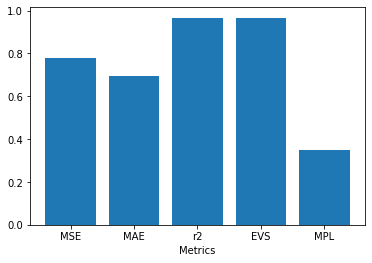

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.97226383 0.95155987 0.95496142 0.97938738 0.98391218]
Average CV Score:  0.9684169353060732
Number of CV Scores used in Average:  5


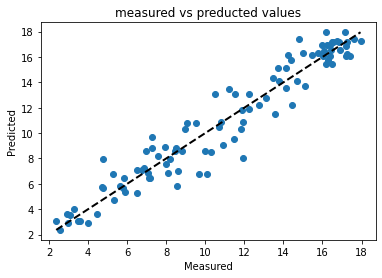

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
gbr_cross = ensemble.GradientBoostingRegressor(n_estimators= 90, criterion= 'squared_error')
scores = cross_val_score(gbr_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
gbr_pred = cross_val_predict(gbr_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, dtc_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**3_ Multylayer perception (MLP)**

In [ ]:
from sklearn.neural_network import MLPRegressor

**How to choose number of hidden layers:**

Nh=Ns(α∗(Ni+No))


α= between 2 _ 10


number of hidden layer= 100/(10*(9+1))

In [138]:
# Fitting the training data to the network

mlp= MLPRegressor(hidden_layer_sizes=(9,1,1), max_iter=10000 ,activation = 'identity', solver='sgd', batch_size= 100, random_state=12)
mlp.fit(x_train, y_train)

MLPRegressor(activation='identity', batch_size=100,
             hidden_layer_sizes=(9, 1, 1), max_iter=10000, random_state=12,
             solver='sgd')

In [ ]:
# # find optimal n_estimators, criterion and random_state with grid search

# activation= ['identity', 'logistic', 'tanh', 'relu']
# solver= ['lbfgs', 'sgd', 'adam']
# random_state= range(0, 43)
# max_iter= [100, 400, 600, 800, 1000]
# param_grid = dict(activation= activation, solver= solver, emax_iter= max_iter
# param_grid = dict(random_state= random_state)

# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
# grid_result = grid.fit(x_train, y_train)

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [ ]:
#Predicting y for x_samp_test

mlp_predict = mlp.predict(x_test)
mlp_predict 

array([15.26730286, 13.75062763,  4.68289598, 10.05325162,  2.2723486 ,
       10.28371157, 16.73334623,  8.3747427 ,  2.75079618, 18.96422955,
        5.55219601, 11.02469654, 11.48808992, 16.38597788,  6.50196097,
       15.13616368, 16.00533374, 16.69215644, 16.65255953,  9.345877  ,
       16.35658739, 14.06102216,  7.52229267, 13.388284  ,  7.05725704,
       17.13455227, 10.01806576, 14.91494339,  3.90244148, 16.61227827])

In [143]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = mlp.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', mlp.score(x_test, y_test))
print('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9890266888714753
MSE:  0.31571992214221006 
 MAE:  0.3747049907479417 
 r2:  0.9890266888714753 
 EVS:  0.9890330460152014 
 MPL:  0.18735249537397086


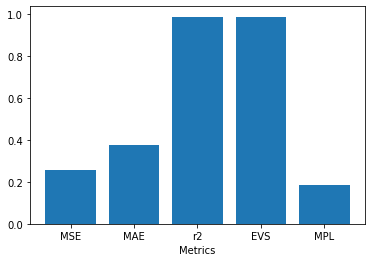

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.9742811  0.95162581 0.95595938 0.97730756 0.98379364]
Average CV Score:  0.9685934985210001
Number of CV Scores used in Average:  5


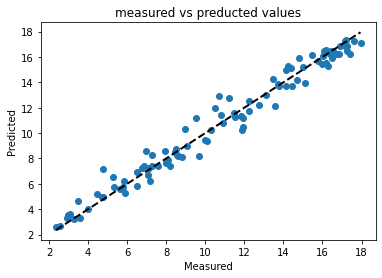

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
mlp_cross = ensemble.GradientBoostingRegressor(n_estimators= 90, criterion= 'squared_error')
scores = cross_val_score(mlp_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
mlp_pred = cross_val_predict(mlp_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, mlp_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**4_ Support vector machine(SVM)**

In [80]:
from sklearn import svm

In [81]:
# Fitting the training data

svm = svm.SVR()
svm.fit (x_train, y_train)

SVR()

In [82]:
#Predicting y for x_samp_test

svm_predict= svm.predict(x_test)
svm_predict

array([14.51109387, 14.66727103,  5.11419588,  9.5670402 ,  5.73224946,
       11.54720642, 14.6310304 ,  9.44305642,  6.55447925, 15.20816896,
        7.19769307, 11.08475422, 12.21298173, 14.43947156,  6.42938566,
       12.79057174, 14.57509443, 16.32128293, 15.22470505,  9.28043488,
       15.58189667, 14.62746065,  8.73257639, 12.57867945,  7.80381812,
       16.78925678,  9.46825672, 13.85398549,  5.93092864, 14.37589012])

In [83]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = svm.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', svm.score(x_test, y_test))
print('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.8714137461929577
MSE:  3.0104141686879653 
 MAE:  1.3768330753972067 
 r2:  0.8714137461929577 
 EVS:  0.8716529625666272 
 MPL:  0.6884165376986033


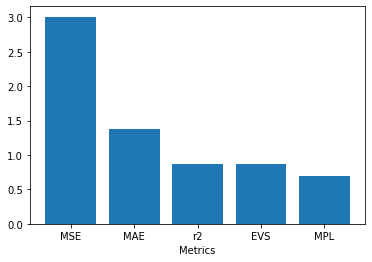

In [84]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.41339338 0.09920909 0.04761529 0.41437464 0.39955395]
Average CV Score:  0.2748292680817501
Number of CV Scores used in Average:  5


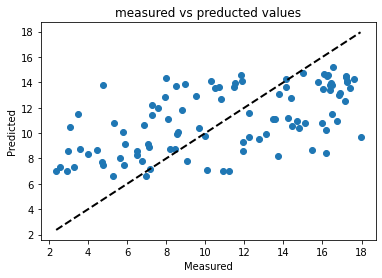

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
svm_cross = svm.SVR()
scores = cross_val_score(svm_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
svm_pred = cross_val_predict(svm_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, svm_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**5_ M5P**

https://github.com/smarie/python-m5p/commit/7249bcb10c752ad35ef1473327d4be1f78d04161

In [ ]:
!pip install m5py
from m5py import M5Prime, export_text_m5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
X_train= np.array(x_train)
Y_train= np.array(y_train)

X= np.array(x)
Y= np.array(y)

#Because M5P model just accept numpy array

In [ ]:
# Fitting the training data

m5p = M5Prime(random_state= 12)
m5p.fit (X_train , Y_train)

M5Prime(leaf_model=DeNormalizableLinearRegression(), random_state=12,
        use_smoothing='installed')

In [ ]:
# find optimal random_state with grid search

from sklearn.model_selection import GridSearchCV

random_state= [0, 12, 24, 42]
param_grid = dict(random_state= random_state)

grid = GridSearchCV(estimator=m5p, param_grid=param_grid, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score:  0.987907921544444
Best Params:  {'random_state': 42}


In [ ]:
#Predicting y for x_samp_test

m5p_predict= m5p.predict(x_test)
m5p_predict

array([14.30804157, 13.76798725,  4.39104033, 10.07228279,  2.02557755,
       10.22900009, 16.65886497,  8.64511204,  2.8497138 , 17.74974632,
        5.24986076, 10.58934498, 11.76115322, 16.30950546,  6.29322815,
       15.85595703, 15.85640621, 16.70656586, 16.93078613,  9.45339203,
       16.18937874, 14.16934204,  7.19626808, 13.18528748,  6.65487957,
       16.97290611,  9.63520813, 15.13759422,  3.62740993, 16.53021622])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = m5p.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', m5p.score(x_test, y_test))
print('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9891731980048167
MSE:  0.25347311367191944 
 MAE:  0.4011229960123697 
 r2:  0.9891731980048167 
 EVS:  0.9897605566472666 
 MPL:  0.20056149800618486


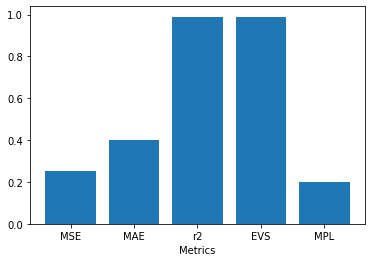

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.98981669 0.98550752 0.98808756 0.99386799 0.9890841 ]
Average CV Score:  0.9892727730890061
Number of CV Scores used in Average:  5


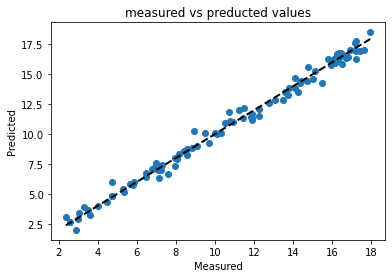

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
m5p_cross = M5Prime(random_state= 12)
scores = cross_val_score(m5p_cross, X, Y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
m5p_pred = cross_val_predict(m5p_cross, X, Y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, m5p_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**6_ BM5P**

https://machinelearningmastery.com/bagging-ensemble-with-python/

In [ ]:
# Fitting the training data

from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor(n_estimators= 50)
bgr.fit (x_train , y_train)

BaggingRegressor(n_estimators=50)

In [ ]:
# find optimal n_estimators with grid search

from sklearn.model_selection import GridSearchCV

n_estimators= [10, 20, 30, 40, 50 ,60, 70, 80, 90 ,100]
param_grid = dict(n_estimators= n_estimators)

grid = GridSearchCV(estimator=bgr, param_grid=param_grid, verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9601026304091999
Best Params:  {'n_estimators': 90}


In [98]:
#Predicting y for x_samp_test

bgr_predict= bgr.predict(x_test)
bgr_predict

array([15.9232, 15.6836,  5.1138, 11.0582,  3.6578, 10.8886, 16.6286,
        8.5346,  2.9856, 16.7686,  5.2026, 11.8812, 10.9234, 16.247 ,
        5.8134, 15.755 , 16.2928, 16.4118, 16.285 ,  8.1852, 16.165 ,
       15.5986,  8.6306, 11.636 ,  7.305 , 16.8064, 10.8434, 14.1304,
        3.9488, 14.606 ])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = bgr.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', bgr.score(x_test, y_test))
print ('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.958446761433357
MSE:  0.9728291666666645 
 MAE:  0.8067400000000001 
 r2:  0.958446761433357 
 EVS:  0.9585384848774325 
 MPL:  0.40337000000000006


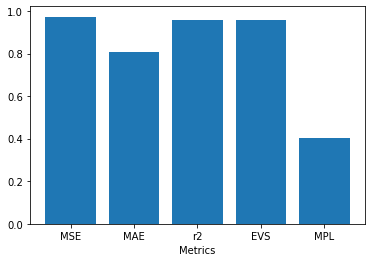

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.97066578 0.92877394 0.944752   0.98235637 0.98087998]
Average CV Score:  0.9614856142599999
Number of CV Scores used in Average:  5


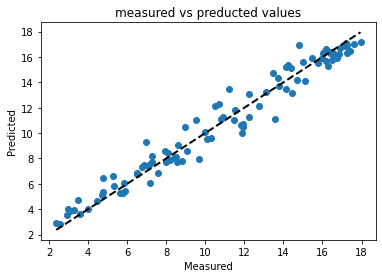

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
bm5p_cross = BaggingRegressor(n_estimators= 50)
scores = cross_val_score(bm5p_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
bm5p_pred = cross_val_predict(bm5p_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, bm5p_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**7_ Ridge Regression**


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Fitting the training data

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.1)
rdg.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# find optimal alpha with grid search

from sklearn.model_selection import GridSearchCV

alpha= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha= alpha)

grid = GridSearchCV(estimator=rdg, param_grid=param_grid, verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Score:  0.9913910752400092
Best Params:  {'alpha': 0.1}


In [ ]:
#Predicting y for x_samp_test

rdg_predict= rdg.predict(x_test)
rdg_predict

array([15.14617868, 13.61379196,  4.70421007, 10.10466234,  2.11950412,
       10.22359148, 16.76239174,  8.28741637,  2.87098131, 18.782868  ,
        5.65106261, 10.99832711, 11.45081228, 16.51097134,  6.54767883,
       15.58905132, 16.04073024, 16.63782509, 16.76994602,  9.38490673,
       16.38527577, 14.13488027,  7.41747754, 13.5112086 ,  7.00058976,
       17.14055414, 10.02325899, 14.95475425,  3.9613015 , 16.68544929])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = rdg.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', rdg.score(x_test, y_test))
print ('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9906304238098321
MSE:  0.2193570780886843 
 MAE:  0.35747802595438455 
 r2:  0.9906304238098321 
 EVS:  0.9906681568836312 
 MPL:  0.17873901297719227


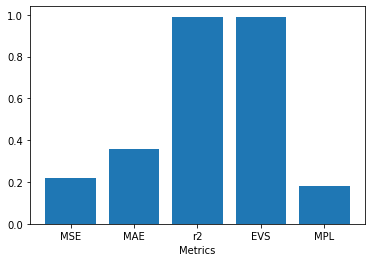

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.98886471 0.98608947 0.98787967 0.9969624  0.99401253]
Average CV Score:  0.9907617563003216
Number of CV Scores used in Average:  5


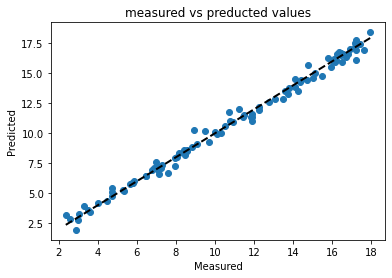

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
rdg_cross = Ridge(alpha=0.1)
scores = cross_val_score(rdg_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
rdg_pred = cross_val_predict(rdg_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, rdg_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**8_ Lasso Regression**

In [ ]:
# Fitting the training data

from sklearn import linear_model

lss = linear_model.Lasso(alpha=0)
lss.fit(x_train, y_train)

Lasso(alpha=0)

In [ ]:
# find optimal alpha with grid search

alpha= [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha= alpha)

grid = GridSearchCV(estimator=lss, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Score:  0.9913864299173598
Best Params:  {'alpha': 0}


In [ ]:
#Predicting y for x_samp_test

lss_predict= lss.predict(x_test)
lss_predict

array([15.13543143, 13.60149824,  4.70776558, 10.11952594,  2.08345416,
       10.20748236, 16.77832838,  8.26271681,  2.90106966, 18.74644102,
        5.67045287, 11.00166338, 11.44677695, 16.55012298,  6.5609356 ,
       15.68323714, 16.05579054, 16.62666327, 16.79781467,  9.39151545,
       16.39526348, 14.14662086,  7.40939652, 13.54042486,  6.98645604,
       17.14132499, 10.02920217, 14.97661371,  3.96900346, 16.70192032])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = lss.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', lss.score(x_test, y_test))
print ('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9908394035297609
MSE:  0.21446452160449064 
 MAE:  0.356347296098665 
 r2:  0.9908394035297609 
 EVS:  0.990897343975471 
 MPL:  0.1781736480493325


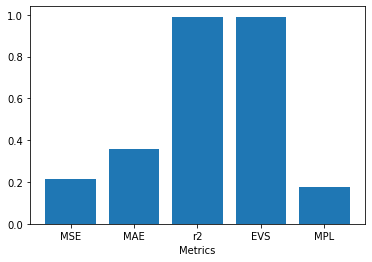

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show() 

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.98981672 0.98550753 0.98808764 0.99698    0.99373047]
Average CV Score:  0.9908244726570421
Number of CV Scores used in Average:  5


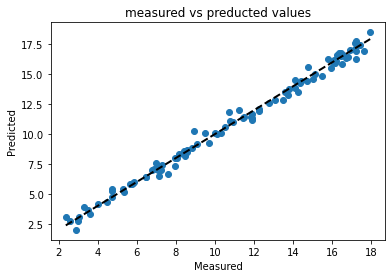

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
lss_cross = linear_model.Lasso(alpha=0)
scores = cross_val_score(lss_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
lss_pred = cross_val_predict(lss_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, lss_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

**9_ RandomForestRegressor**

In [ ]:
# Fitting the training data

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rfr= RandomForestRegressor(n_estimators= 60, criterion= 'squared_error', random_state= 42)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [ ]:
# find optimal n_estimators, criterion and random_state with grid search

# criterion= ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
# n_estimators = [10, 20, 30, 40, 50 ,60, 70, 80, 90 ,100]
# random_state= [0, 12, 24, 42]
# param_grid = dict(n_estimators= n_estimators, criterion= criterion, random_state= random_state)

# grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
# grid_result = grid.fit(x_train, y_train)

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [ ]:
#Predicting y for x_samp_test

rfr_predict= rfr.predict(x_test)
rfr_predict

array([15.72683333, 15.50633333,  4.86483333, 11.274     ,  3.736     ,
       10.83916667, 16.48666667,  8.21583333,  2.808     , 16.725     ,
        4.9985    , 11.7385    , 10.921     , 16.13866667,  6.036     ,
       15.62983333, 16.066     , 16.36783333, 16.1895    ,  7.91433333,
       15.79783333, 15.32416667,  8.51166667, 11.30083333,  7.07733333,
       16.60966667, 10.78233333, 14.1145    ,  4.16366667, 14.71366667])

In [ ]:
#calculating the scores

from sklearn import metrics

expected_y  = y_test
predicted_y = rfr.predict(x_test)

MSE= metrics.mean_squared_error(expected_y, predicted_y)
MAE= metrics.mean_absolute_error(expected_y, predicted_y)
r2= metrics.r2_score(expected_y, predicted_y)
EVS= metrics.explained_variance_score(expected_y, predicted_y)
MPL= metrics.mean_pinball_loss(expected_y, predicted_y)
# d2p= metrics.d2_pinball_score(expected_y, predicted_y)
# d2a= metrics.d2_absolute_error_score(expected_y, predicted_y)

print ('score: ', rfr.score(x_test, y_test))
print ('MSE: ', MSE,"\n",'MAE: ', MAE,"\n",'r2: ', r2,"\n",'EVS: ', EVS,"\n",'MPL: ', MPL)

score:  0.9568984328268919
MSE:  1.0090780675925917 
 MAE:  0.820761111111111 
 r2:  0.9568984328268919 
 EVS:  0.957077328804132 
 MPL:  0.4103805555555555


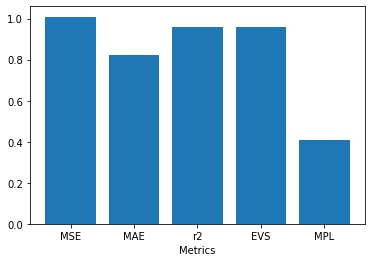

In [ ]:
# Drawing metrics plot

array = ('MSE', 'MAE', 'r2', 'EVS', 'MPL')
count= (MSE ,MAE, r2, EVS, MPL)
plt.bar(array, count)
plt.xlabel('Metrics')
plt.show()

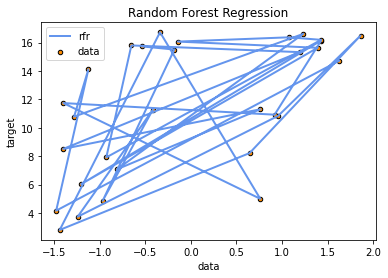

In [131]:
plt.figure()
plt.scatter(x_test[:,0], rfr_predict, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(x_test[:,0], rfr_predict, color="cornflowerblue", label= 'rfr' , linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

**K_fold Cross Validation**

https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation Scores:  [0.9673469  0.93154911 0.94715015 0.98344698 0.98071909]
Average CV Score:  0.9620424469920644
Number of CV Scores used in Average:  5


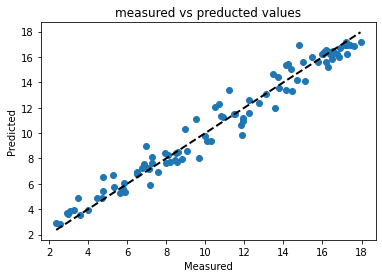

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Getting score of each fold
rfr_cross = RandomForestRegressor(n_estimators= 60, criterion= 'squared_error', random_state= 42)
scores = cross_val_score(rfr_cross, x, y, cv =5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Predicting
rfr_pred = cross_val_predict(rfr_cross, x, y, cv=5)

# Plotting measured vs preducted values
fig,ax = plt.subplots()
ax.scatter(y, rfr_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')
fig.show()

In [119]:
rows= [dtc_pred, gbr_pred, mlp_pred, svm_pred, m5p_pred, bm5p_pred, rdg_pred, lss_pred, rfr_pred]
columns= [dtc_pred, gbr_pred, mlp_pred, svm_pred, m5p_pred, bm5p_pred, rdg_pred, lss_pred, rfr_pred]


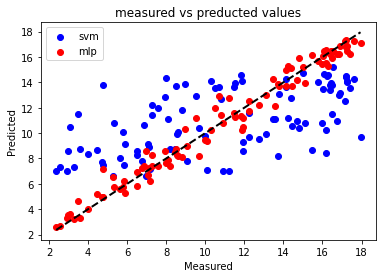

In [130]:
# Plotting multiple models on scatter plot (cross validation)

fig,ax = plt.subplots()

# First Scatter plot
ax.scatter(y, svm_pred, color= 'blue')
#Second Scatter plot
ax.scatter(y, mlp_pred, color ="red")

plt.legend(['svm', 'mlp'])

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')


plt.show()

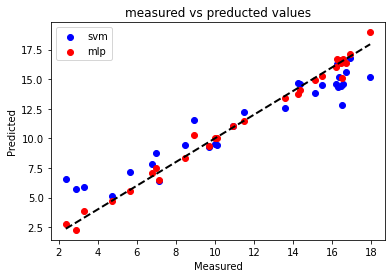

In [137]:
# Plotting multiple models on scatter plot (train and test split)

fig,ax = plt.subplots()

# First Scatter plot
ax.scatter(y_test, svm_predict, color= 'blue')
#Second Scatter plot
ax.scatter(y_test, mlp_predict, color ="red")

plt.legend(['svm', 'mlp'])

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('measured vs preducted values')


plt.show()